In [3]:
import pandas as pd
results = pd.read_csv('result.csv')
results[results['classification/accuracy'].notnull()].tail(1)

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy,classification/accuracy,classification/weighted_f1_score
2210,2211,2600496,35376,0.007038,1.0,1.0,NaN,NaN,NaN,0.894912,0.893186


<AxesSubplot:>

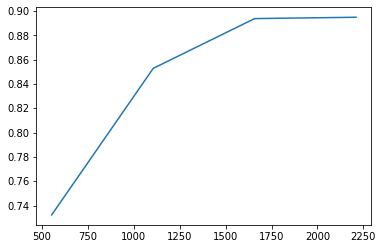

In [4]:
results[results['classification/accuracy'].notnull()]['classification/accuracy'].plot()

In [13]:
import openai
import numpy as np
ft_model = 'curie:ft-personal-2023-01-27-01-21-59'
res = openai.Completion.create(model=ft_model, prompt="ieri mi hanno rubato l'iphone con su tutti i dati delle mie carte cosa devo fare?" + '\n\n###\n\n', logprobs=2, temperature = 0,max_tokens=1)
for el in res['choices'][0]["logprobs"]["top_logprobs"][0].values():
    print(np.exp(el))
res['choices'][0]['text']

0.0492885241939687
0.936719510509287


'42'

In [10]:
res

<OpenAIObject text_completion id=cmpl-6dggIUrkdzEzuR8M91PoJDnPgdPEo at 0x1abcd7bf1a0> JSON: {
  "choices": [
    {
      "finish_reason": "length",
      "index": 0,
      "logprobs": {
        "text_offset": [
          50
        ],
        "token_logprobs": [
          -0.5135348
        ],
        "tokens": [
          "\n"
        ],
        "top_logprobs": [
          {
            "\n": -0.5135348,
            "60": -1.2008002
          }
        ]
      },
      "text": "\n"
    }
  ],
  "created": 1674916878,
  "id": "cmpl-6dggIUrkdzEzuR8M91PoJDnPgdPEo",
  "model": "curie:ft-personal-2023-01-27-01-21-59",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 1,
    "prompt_tokens": 21,
    "total_tokens": 22
  }
}

In [11]:
np.exp(  -1.2008002)

0.30095329270845883

In [25]:
res

<OpenAIObject text_completion id=cmpl-6deGpNbvUpu2ABPvvbKKKGBmFr3DF at 0x1ea2802db70> JSON: {
  "choices": [
    {
      "finish_reason": "length",
      "index": 0,
      "logprobs": {
        "text_offset": [
          47
        ],
        "token_logprobs": [
          -0.0057957144
        ],
        "tokens": [
          "12"
        ],
        "top_logprobs": [
          {
            "11": -5.268861,
            "12": -0.0057957144
          }
        ]
      },
      "text": "12"
    }
  ],
  "created": 1674907611,
  "id": "cmpl-6deGpNbvUpu2ABPvvbKKKGBmFr3DF",
  "model": "curie:ft-personal-2023-01-27-01-21-59",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 1,
    "prompt_tokens": 18,
    "total_tokens": 19
  }
}

In [4]:
# HOW TO RUN THE TRAINING 

# openai api fine_tunes.create -t "C:/Users/nicol/Desktop/Personal/conversational_ai/banking77_prepared_train_it1.jsonl" -v "C:/Users/nicol/Desktop/Personal/conversational_ai/banking77_prepared_valid_it1.jsonl" -m curie --compute_classification_metrics --classification_n_classes 77



^C


In [ ]:
openai api fine_tunes.follow -i ft-4QlSksGMpbufWXuLgRqCek6q

In [ ]:
openai api completions.create -m curie:ft-personal-2023-01-27-01-21-59 -p <YOUR_PROMPT>